In [2]:
#------ Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import calendar
import urllib3
from datetime import datetime

In [3]:
#------ Importing the datasets

# Years 2014 ~ 2017
dataset_d = {}
dataset_m = {}
month_list = ["janeiro", "fevereiro", "marco", "abril", "maio", "junho", "julho", "agosto", "setembro", "outubro", "novembro", "dezembro"]
month_list_abr = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
errors = []

current_year = 2017
for year in range(2014, current_year + 1):
    for month in range(1, 13):
        for day in range(1, calendar.monthrange(year, month)[1] + 1):
            year_str = str(year)
            month_str = str(month)
            day_str = str(day)
            
            month_str = month_str.zfill(2)
            day_str = day_str.zfill(2)
            date_str = year_str + month_str + day_str
            
            if year <= 2014 and month < 10: #Before this date, the links doesn't have /before acesso_a_informacao
                url = ("http://www.prefeitura.sp.gov.br/cidade/secretarias/upload/transportes/SPTrans/{}/{}/passageiros/Passag-{}.xls".format(year_str, month_list[month - 1], date_str))
            else:
                url = ("http://www.prefeitura.sp.gov.br/cidade/secretarias/upload/transportes/SPTrans/acesso_a_informacao/{}/{}/passageiros/Passag-{}.xls".format(year_str, month_list[month - 1], date_str))
            http = urllib3.PoolManager()
            r = http.request('GET', url)
            
            if r.status < 400:
                dataset_d[date_str] = pd.read_excel(url)
                last_day= day
            else:
                errors.append(url)
                if year == current_year:
                    break

        if year == 2014 and month <= 12: #Before this date, the links doesn't have /before acesso_a_informacao
            if year == 2014 and month == 4:
                url_total = ("http://www.prefeitura.sp.gov.br/cidade/secretarias/upload/transportes/SPTrans/{}/{}/passageiros/Pass_Transp_{}.xlsx".format(year_str, month_list[month - 1], month_list_abr[month - 1] + str(year % 100)))
            elif year == 2014 and month == 10 or month == 11:
                url_total = ("http://www.prefeitura.sp.gov.br/cidade/secretarias/upload/transportes/SPTrans/acesso_a_informacao/{}/{}/passageiros/Pass_Transp_{}.xls".format(year_str, month_list[month - 1], month_list_abr[month - 1] + str(year % 100)))
            elif year == 2014 and month == 12:
                url_total = ("http://www.prefeitura.sp.gov.br/cidade/secretarias/upload/transportes/SPTrans/acesso_a_informacao/{}/{}/passageiros/Pass_Transp_{}.xlsx".format(year_str, month_list[month - 1], month_list_abr[month - 1] + str(year % 100)))
            else:
                url_total = ("http://www.prefeitura.sp.gov.br/cidade/secretarias/upload/transportes/SPTrans/{}/{}/passageiros/Pass_Transp_{}.xls".format(year_str, month_list[month - 1], month_list_abr[month - 1] + str(year % 100)))   
        else:
            url_total = ("http://www.prefeitura.sp.gov.br/cidade/secretarias/upload/transportes/SPTrans/acesso_a_informacao/{}/{}/passageiros/Pass_Transp_{}.xls".format(year_str, month_list[month - 1], month_list_abr[month - 1] + str(year % 100)))
        
        http = urllib3.PoolManager()
        r = http.request('GET', url_total)
        
        if r.status < 400:
            dataset_m[year_str + month_str] = pd.read_excel(url_total)
            last_month = month
        else:
            errors.append(url_total)
            if year == current_year:
                break


In [4]:
#------ Verifying Numbers
   
# Let's check if the sum of the days of month hits with the worksheet's total
import time
total = {}
total_paying = {}
total_integration = {}
total_free_passengers = {}
total_free_students = {}

xTicks = []

ytotal = []
ytotal_paying = []
ytotal_integration = []
ytotal_free_passengers = []
ytotal_free_students = []

for year in range(2014, current_year + 1):
    for month in range(1, 13):
        
        if year == 2017 and (month == last_month):
            break

        total_month = 0
        total_paying_month = 0
        total_integration_month = 0
        total_free_passengers_month = 0
        total_free_students_month = 0
        
        for day in range(1, calendar.monthrange(year, month)[1] + 1):
            year_str = str(year)
            month_str = str(month)
            day_str = str(day)
            month_str = month_str.zfill(2)
            day_str = day_str.zfill(2)
            date_str = year_str + month_str + day_str
            
            total_month = dataset_d[date_str].iloc[:,dataset_d[date_str].shape[1] -1 ].sum() + total_month
            
            if time.strptime(date_str, "%Y%m%d") >= time.strptime("20150409", "%Y%m%d"): 
                 total_paying_month = dataset_d[date_str].iloc[:,dataset_d[date_str].shape[1] -5 ].sum() + total_paying_month
                 total_integration_month = dataset_d[date_str].iloc[:,dataset_d[date_str].shape[1] -4 ].sum() + total_integration_month
                 total_free_passengers_month = dataset_d[date_str].iloc[:,dataset_d[date_str].shape[1] -3 ].sum() + total_free_passengers_month
                 total_free_students_month = dataset_d[date_str].iloc[:,dataset_d[date_str].shape[1] -2 ].sum() + total_free_students_month
            else:            
                 total_paying_month = dataset_d[date_str].iloc[:,dataset_d[date_str].shape[1] -4 ].sum() + total_paying_month
                 total_integration_month = dataset_d[date_str].iloc[:,dataset_d[date_str].shape[1] -3 ].sum() + total_integration_month
                 total_free_passengers_month = dataset_d[date_str].iloc[:,dataset_d[date_str].shape[1] -2 ].sum() + total_free_passengers_month
                
        total[year_str+month_str] = int(total_month)
        total_paying[year_str+month_str] = int(total_paying_month)
        total_integration[year_str+month_str] = int(total_integration_month)
        total_free_passengers[year_str+month_str] = int(total_free_passengers_month)
        total_free_students[year_str+month_str] = int(total_free_students_month)
        
        print ("Para o Mês de {} de {}, somando-se dia a dia chegamos em {} passageiros.".format(month_list[month - 1].title(), year, ('%f' % total[year_str+month_str]).rstrip('0').rstrip('.')))
        print ("Na planilha consolidada no Site da SPTrans o valor fornecido foi de {} passageiros".format(dataset_m[year_str + month_str].iloc[:,dataset_m[year_str + month_str].shape[1] -1].sum()))
        print ("Diferença de {} passageiros".format(total[year_str+month_str] - dataset_m[year_str + month_str].iloc[:,dataset_m[year_str + month_str].shape[1] -1 ].sum() ))
        print ("")
        
        xTicks.append(month_list_abr[month - 1].title() + " " + year_str) # for plot
        
        ytotal.append(total_month/10**6)
        ytotal_paying.append(total_paying_month/10**6)
        ytotal_integration.append(total_integration_month/10**6)
        ytotal_free_passengers.append(total_free_passengers_month/10**6)
        ytotal_free_students.append(total_free_students_month/10**6)

Para o Mês de Janeiro de 2014, somando-se dia a dia chegamos em 225130349 passageiros.
Na planilha consolidada no Site da SPTrans o valor fornecido foi de 225130349 passageiros
Diferença de 0 passageiros

Para o Mês de Fevereiro de 2014, somando-se dia a dia chegamos em 234365831 passageiros.
Na planilha consolidada no Site da SPTrans o valor fornecido foi de 234365831 passageiros
Diferença de 0 passageiros

Para o Mês de Marco de 2014, somando-se dia a dia chegamos em 241120083 passageiros.
Na planilha consolidada no Site da SPTrans o valor fornecido foi de 241120083 passageiros
Diferença de 0 passageiros

Para o Mês de Abril de 2014, somando-se dia a dia chegamos em 243628063 passageiros.
Na planilha consolidada no Site da SPTrans o valor fornecido foi de 243628063 passageiros
Diferença de 0 passageiros

Para o Mês de Maio de 2014, somando-se dia a dia chegamos em 246013104 passageiros.
Na planilha consolidada no Site da SPTrans o valor fornecido foi de 246013104 passageiros
Diferenç

In [12]:
#------ Some Statitics

import statistics
print ("Arithmetic mean (average) of data: {}".format(statistics.mean(ytotal)))
print ("Sample standard deviation of data: {}".format(statistics.stdev(ytotal)))

Arithmetic mean (average) of data: 239.25495018421054
Sample standard deviation of data: 15.306941238352449


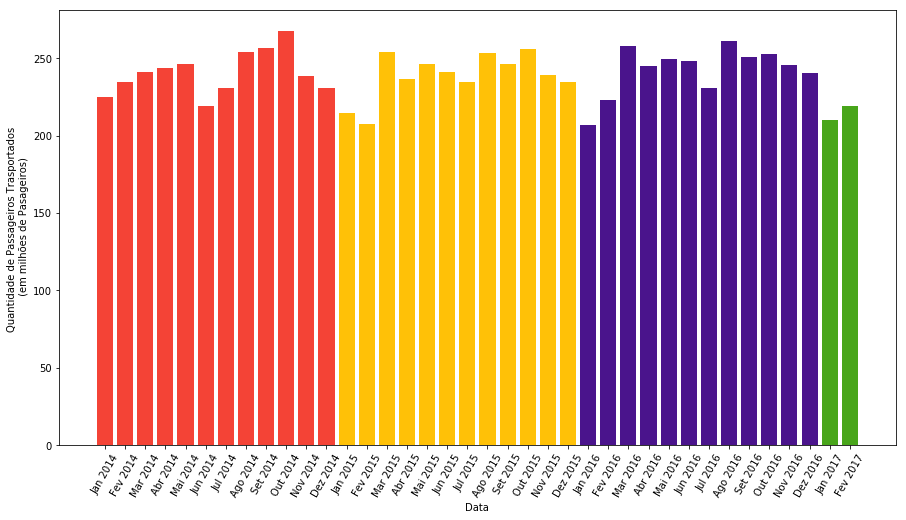

In [23]:

#------ Plotting Total Passengers vs. Month
plt.figure(figsize=(15,8))
x = list(range(0, len(ytotal) ))
plt.xticks(x, xTicks)
plt.xticks(range(len(ytotal)), xTicks, rotation=60) #writes strings with 45 degree angle
colors = []
for i in range(0, len(ytotal)):
    if i < 12:
        colors.append('#F44336')
    elif i >= 12 and i < 24:
        colors.append('#FFC107')
    elif i >= 24 and i < 36:
        colors.append('#4A148C')
    else :
        colors.append('#48A51A')
plt.bar(x,ytotal, color=colors)
plt.xlabel("Data")
plt.ylabel('Quantidade de Passageiros Trasportados \n (em milhões de Pasageiros)')   
plt.show()

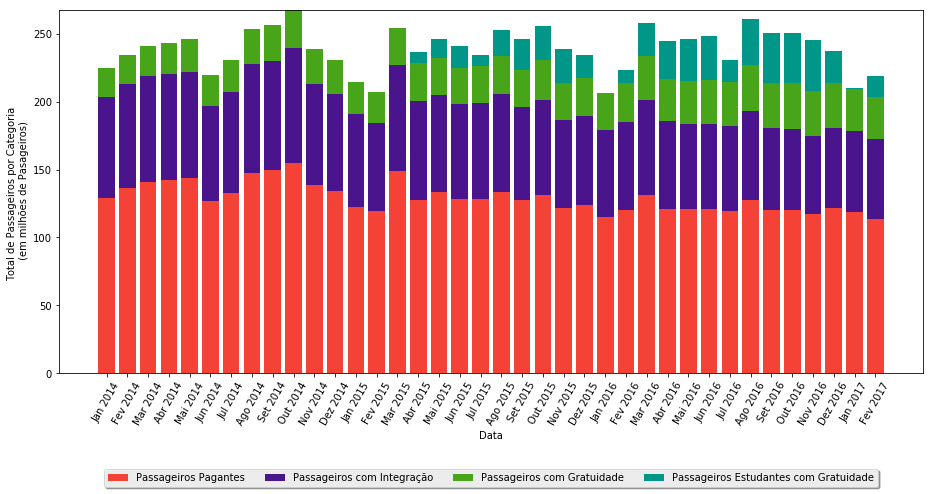

In [25]:
#------ Plotting Paying Passenger and Integration Passenger and Free Passengers and Free Pass Students vs Month

raw_data = {'Date': xTicks,
        'Passageiros Pagantes': ytotal_paying,
        'Passageiros com Integração': ytotal_integration,
        'Passageiros com Gratuidade': ytotal_free_passengers,
        'Passageiros Estudantes com Gratuidade': ytotal_free_students}
df = pd.DataFrame(raw_data, columns = ['Date', 'Passageiros Pagantes','Passageiros com Integração', 'Passageiros com Gratuidade', 'Passageiros Estudantes com Gratuidade'])
df

# Create the general blog and the "subplots" i.e. the bars
f, ax1 = plt.subplots(1, figsize=(15,8))

# Set the bar width
bar_width = 0.8

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(df['Passageiros Pagantes']))]

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = list(range(1, len(xTicks) + 1))

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the pre_score data
        df['Passageiros Pagantes'],
        # set the width
        width=bar_width,
        # with the label pre score
        label='Passageiros Pagantes',
        # with color
        color='#F44336')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the mid_score data
        df['Passageiros com Integração'],
        # set the width
        width=bar_width,
        # with pre_score on the bottom
        bottom=df['Passageiros Pagantes'],
        # with the label mid score
        label='Passageiros com Integração',
        # with color
        color='#4A148C')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the post_score data
        df['Passageiros com Gratuidade'],
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j for i,j in zip(df['Passageiros Pagantes'],df['Passageiros com Integração'])],
        # with the label post score
        label='Passageiros com Gratuidade',
        # with color
        color='#48A51A')

ax1.bar(bar_l,
        # using the post_score data
        df['Passageiros Estudantes com Gratuidade'],
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j+k for i,j,k in zip(df['Passageiros Pagantes'],df['Passageiros com Integração'], df['Passageiros com Gratuidade'])],
        # with the label post score
        label='Passageiros Estudantes com Gratuidade',
        # with color
        color='#009688')

# set the x ticks with names
plt.xticks(tick_pos, df['Date'], rotation = 60)

# To label don't cut off 
#plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.25, left=0.1)

# Set the label and legends
ax1.set_ylabel("Total de Passageiros por Categoria \n (em milhões de Pasageiros)")
ax1.set_xlabel("Data")
#plt.legend(loc='upper right')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),
          fancybox=True, shadow=True, ncol=4)
plt.show()